In [70]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [72]:
os.environ["CUDA_VISIBLE_DEVICES"]="2,3"

In [73]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [40]:
from PIML.box.boxWR import BoxWR

In [41]:
b = BoxWR()

INFO:root:#220 R=1000.00
INFO:root:instrument Res = 5000,  dotSqrt of 2.00
INFO:root:snr2nl-SN: [1.9115637429096117e+02, 63.69252759978373, 47.75954676338655, 38.19975826154824, 19.080181257871626, 9.520392756033315, 6.33379658875388, 4.740498505114161, 3.7845196549303295]
INFO:root:nlList: [194.983  97.595  71.443]
INFO:root:Top #220 eigs [105.32   7.07   5.2    1.44   1.21   0.76   0.57   0.49   0.35   0.28]


sky_H (2204,)
(2204,) 0
Building RBF with gaussan kernel on data shape (2880,)
Building RBF with gaussan kernel on data shape (2880, 220)


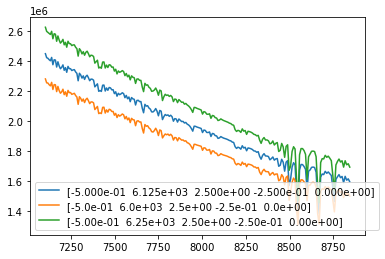

In [42]:
W="RedM"; R="R"; Res=5000;step=10;
b.init(W,R, Res,step, onPCA=1, topk=10)

In [63]:
from PIML.nn.dnn.dnnWR import dnnWR

In [64]:
d = dnnWR(b)

In [66]:
d.init_train(mtype="NzDNN", name="", save=0, trainNL=None, nTrain=16384)

In [67]:
d.train(lr=0.01, dp=0.02, batch=512, nEpoch=300, verbose=0)

Layers: [10, 128, 64, 32, 16, 3]


INFO:root:None
INFO:root:Prepareing #16384 NL=194.98307683402768 trainset
INFO:root:| EP 300 |loss: 0.0305 | mean_: 0.0305 | val_l: 0.0291 | val_m: 0.0291 | lr: 0.0000 | 
INFO:root:timing 156.4 sec


In [68]:
d.test(nTest=100,testNL =None)

100%|██████████| 10/10 [00:00<00:00, 10.82it/s]


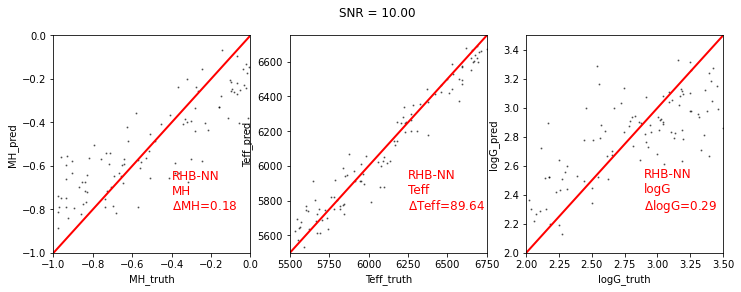

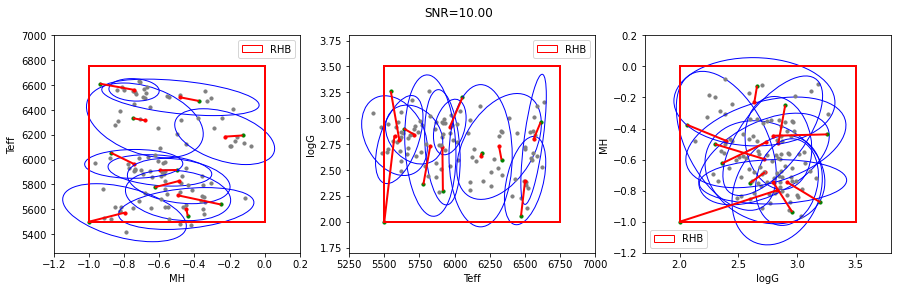

In [69]:
d.init_eval()

In [40]:
from PIML.box.boxWR import BoxWR

In [75]:
B = BoxWR()

INFO:root:#220 R=1000.00
INFO:root:instrument Res = 5000,  dotSqrt of 2.00
INFO:root:snr2nl-SN: [2.804220740051746e+02, 93.50366038944358, 70.1388586874772, 56.11997766629738, 28.082215623937728, 14.0633346027579, 9.390374262364624, 7.053894092167988, 5.652005990050005]
INFO:root:nlList: [286.954 157.652  96.58 ]
INFO:root:Top #220 eigs [1.940e+02 1.464e+01 5.750e+00 1.870e+00 9.300e-01 7.300e-01 6.000e-01
 3.400e-01 2.400e-01 1.700e-01]


sky_H (2204,)
(2204,) 0
Building RBF with gaussan kernel on data shape (5760,)
Building RBF with gaussan kernel on data shape (5760, 220)


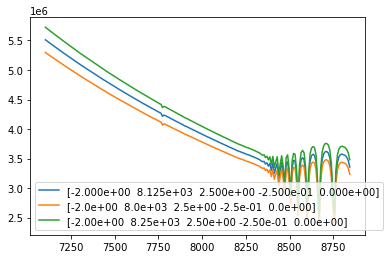

In [77]:
W="RedM"; R="B"; Res=5000;step=10;
B.init(W,R, Res,step, onPCA=1, topk=10)

In [78]:
dB = dnnWR(B)

In [79]:
dB.init_train(mtype="NzDNN", name="", save=0, trainNL=None, nTrain=16384)

In [80]:
dB.train(lr=0.01, dp=0.02, batch=512, nEpoch=300, verbose=0)

Layers: [10, 128, 64, 32, 16, 3]


INFO:root:None
INFO:root:Prepareing #16384 NL=286.95418550066125 trainset
INFO:root:| EP 300 |loss: 0.0340 | mean_: 0.0340 | val_l: 0.0335 | val_m: 0.0335 | lr: 0.0000 | 
INFO:root:timing 100.0 sec


In [83]:
dB.test(nTest=100,testNL =195)

100%|██████████| 10/10 [00:00<00:00, 10.74it/s]


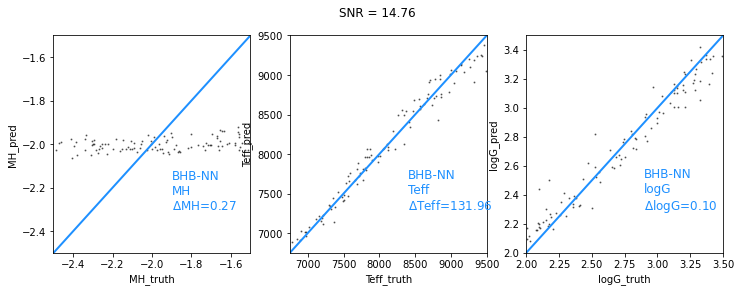

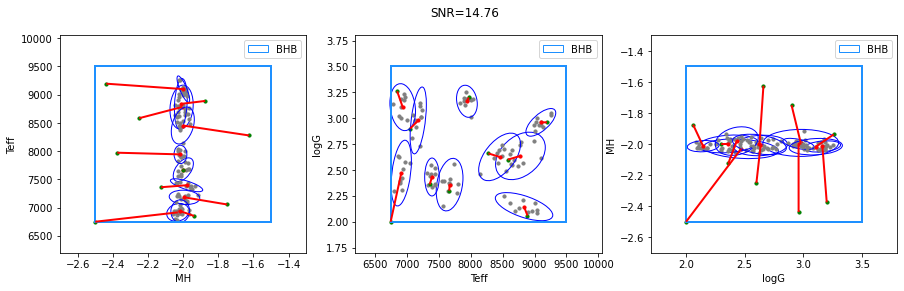

In [85]:
dB.init_eval()

In [ ]:
NL, NL2 = 100, 30
b.estimate_snr(NL), b.estimate_snr(NL2)

(9.871877953134684, 30.027468137778378)

noise_level 100


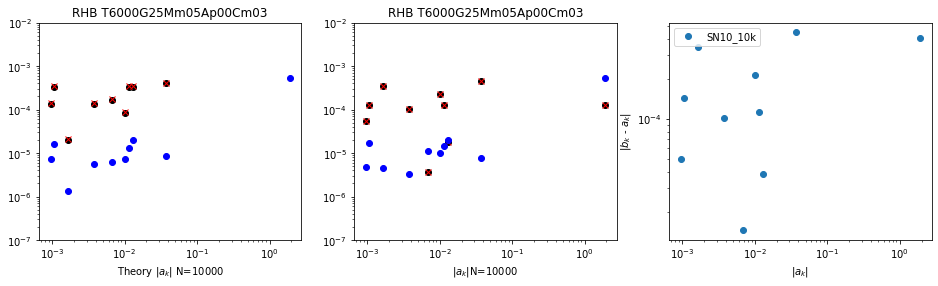

In [428]:
diff_10k_100, bias_10k_100, bias_10k_100X = b.eval_pca_bias(b.PhyMid, 10000, noise_level=NL)
b.plot_pca_bias([diff_10k_100], bias_10k_100,bias_10k_100X, pmt=None, diff_labels=["SN10_10k","SN30_10k","SN10_1M"], N=10000)

In [294]:
diff_10k_100, bias_10k_100, bias_10k_100X = b.eval_pca_bias(b.PhyMid, 10000, noise_level=NL)
# diff_10k_30, bias_10k_30, bias_10k_30X = b.eval_pca_bias(b.PhyMid, 10000, noise_level=NL2)
# diff_1M_100, bias_1M_100, bias_10k_100X = b.eval_pca_bias(b.PhyMid, 1000000, noise_level=NL)

noise_level 100
noise_level 30
noise_level 100


In [304]:
diffs = [diff_10k_100, diff_10k_30, diff_1M_100]

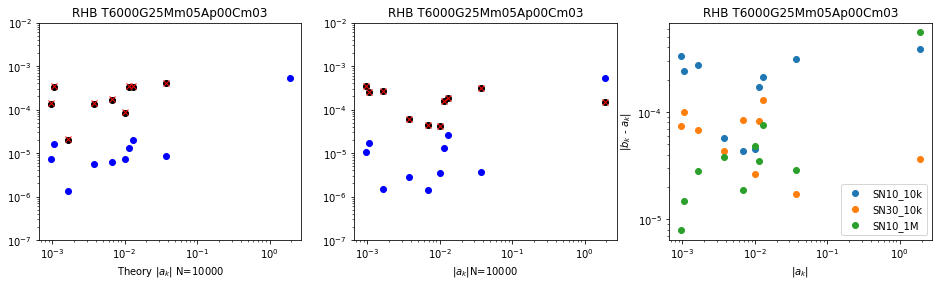

In [305]:
b.plot_bias_evals(diffs, bias_10k_100,biasX= bias_10k_100X, pmt=None, diff_labels=["SN10_10k","SN30_10k","SN10_1M"], N=10000)

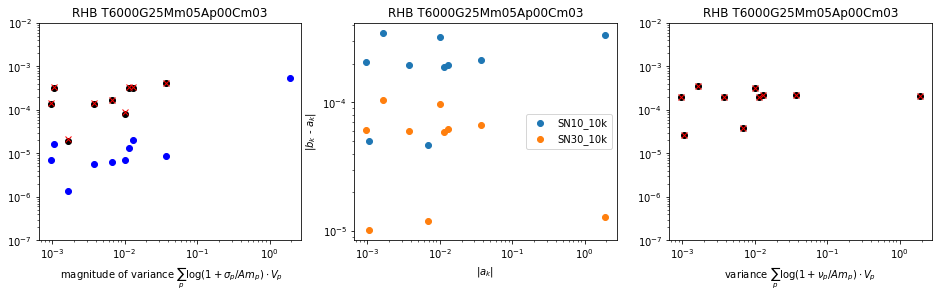

In [240]:
b.plot_bias_evals(diffs, bias_10k_100,biasX= bias_10k_100X, pmt=None, diff_labels=["SN10_10k","SN30_10k","SN10_1M"])

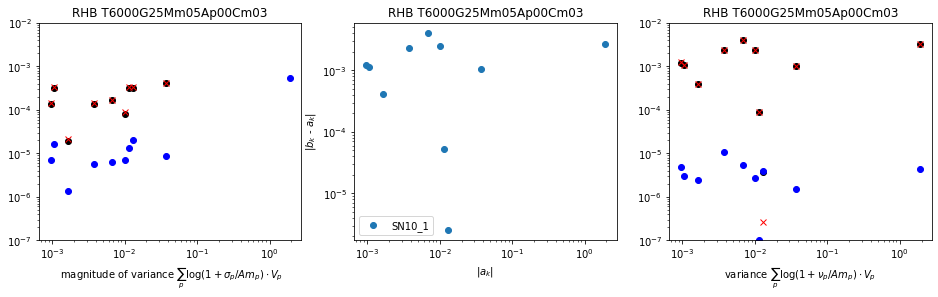

In [241]:
b.plot_bias_evals([diff], bias1,biasX= bias1X, pmt=None, diff_labels=["SN10_1","SN30_10k","SN10_1M"])

In [ ]:
nu = (obsfluxs - b.interp_obs_fn(pmt))
obssig = obsvar **0.5
X = nu / obssig

In [138]:
biass = b.interp_bias_fn(stdmag, X=X)

In [171]:
AModel =  b.interp_obs_fn(pmt, log=0)

In [191]:
stdmag = b.interp_stdmag_fn(pmt, noise_level)


In [301]:
 bias1k, bias1kX

((array([ 0.00020829, -0.00015779,  0.00014338, -0.00016252, -0.00035759,
          0.00016052, -0.0002919 ,  0.00014485,  0.0002116 , -0.00019231]),
  array([ 0.00020837, -0.00015777,  0.00014339, -0.00016248, -0.00035758,
          0.00016048, -0.00029193,  0.00014486,  0.0002116 , -0.00019231]),
  array([ 7.89004536e-08,  2.91606356e-08,  9.51991691e-09,  4.58034430e-08,
          5.22522110e-09, -3.62186116e-08, -2.92237493e-08,  1.24589322e-08,
          2.58164007e-09, -1.64779778e-09])),
 (array([ 0.00020829, -0.00015779,  0.00014338, -0.00016252, -0.00035759,
          0.00016052, -0.0002919 ,  0.00014485,  0.0002116 , -0.00019231]),
  array([ 0.00020837, -0.00015777,  0.00014339, -0.00016248, -0.00035758,
          0.00016048, -0.00029193,  0.00014486,  0.0002116 , -0.00019231]),
  array([ 5.31900720e-04, -2.94286722e-05,  7.22496609e-06,  2.61039595e-06,
         -1.19241504e-06, -2.14671267e-06,  8.01163044e-06,  1.58855024e-05,
          6.19397552e-06,  5.52675837e-06])))

noise_level 100


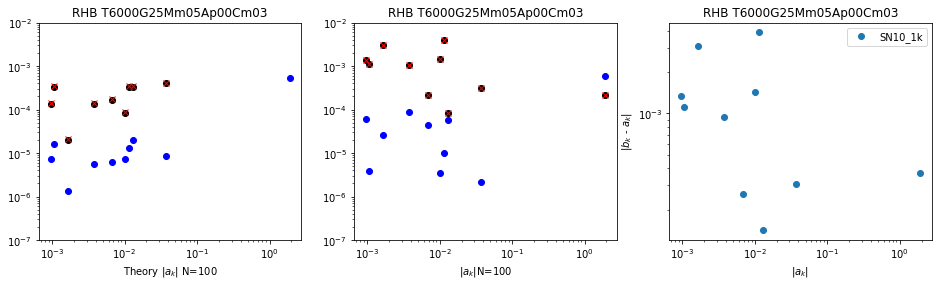

In [310]:
N=100
diff1k, bias1k, bias1kX = b.eval_pca_bias(pmt, N, noise_level=100, snr=None)
b.plot_bias_evals([diff1k], bias1k,biasX= bias1kX, pmt=None, diff_labels=["SN10_1k","SN30_10k","SN10_1M"], N=N)

noise_level 100


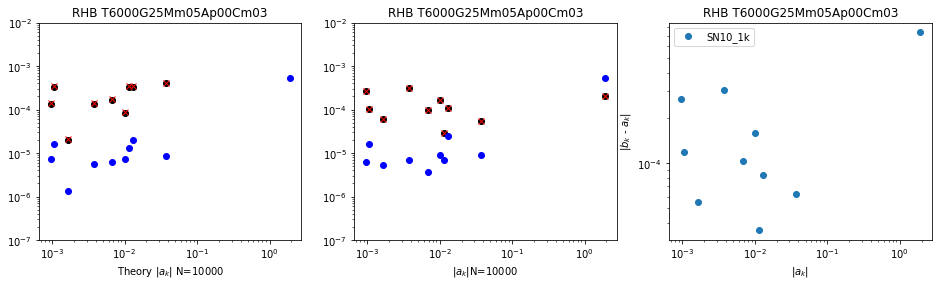

In [316]:
N=10000
diff1k, bias1k, bias1kX = b.eval_pca_bias(pmt, N, noise_level=100, snr=None)
b.plot_bias_evals([diff1k], bias1k,biasX= bias1kX, pmt=None, diff_labels=["SN10_1k","SN30_10k","SN10_1M"], N=N)

noise_level 100


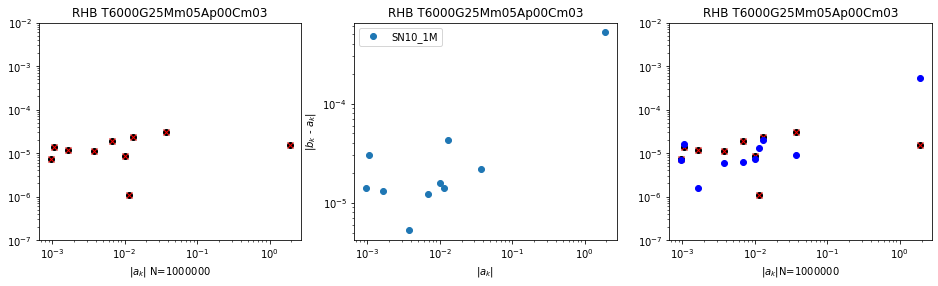

In [272]:
N=1000000
diff1M, bias1M, bias1MX, X1M = b.eval_pca_bias(pmt, N, noise_level=100, snr=None)
b.plot_bias_evals([diff1M], bias1M,biasX= bias1MX, pmt=None, diff_labels=["SN10_1M","SN30_10k","SN10_1M"], N=N)

array([2.20608354e-02, 3.21809748e-04, 4.06772262e-04, 8.19613025e-05,
       1.95410196e-05, 1.36460094e-04, 3.26632682e-04, 3.24538099e-04,
       1.65232667e-04, 1.37377478e-04])

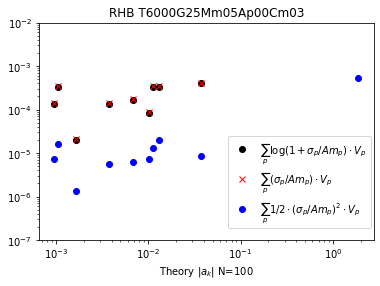

In [318]:
b.plot_theory_bias(ak, bias1k, NL=NL, log=1, theory=1, N=100, lgd=1)

array([2.05739414e-04, 1.08393672e-04, 5.32183136e-05, 1.68496595e-04,
       6.02057993e-05, 3.14577178e-04, 2.90778392e-05, 1.02502030e-04,
       9.97323856e-05, 2.61265365e-04])

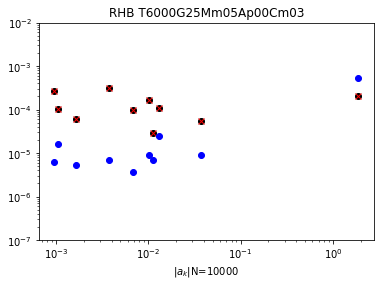

In [317]:
b.plot_theory_bias(ak, bias1kX, NL=NL, log=1, theory=0, N=10000)

array([1.54205716e-05, 2.34346697e-05, 3.07903587e-05, 8.38790796e-06,
       1.15276874e-05, 1.13277389e-05, 1.09047525e-06, 1.36730270e-05,
       1.84836684e-05, 7.11573278e-06])

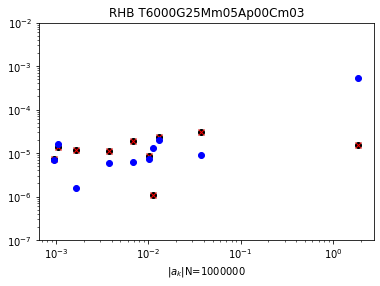

In [312]:
b.plot_theory_bias(ak, bias1MX, NL=NL, log=1, theory=0, N=1000000)

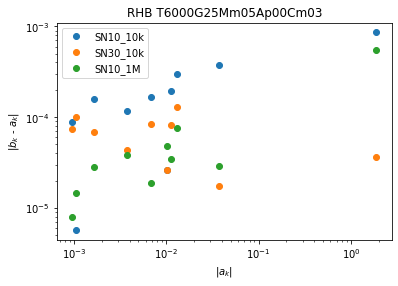

In [300]:
b.plot_exp_bias(ak, diffs, labels=["SN10_10k","SN30_10k","SN10_1M"])

In [324]:
b.minmax_rescaler=b.rescaler

In [329]:
pmts=b.get_random_pmt(100)

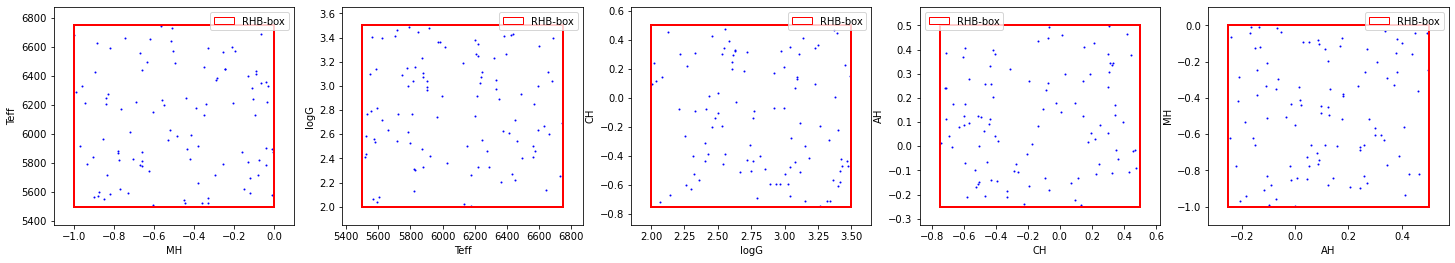

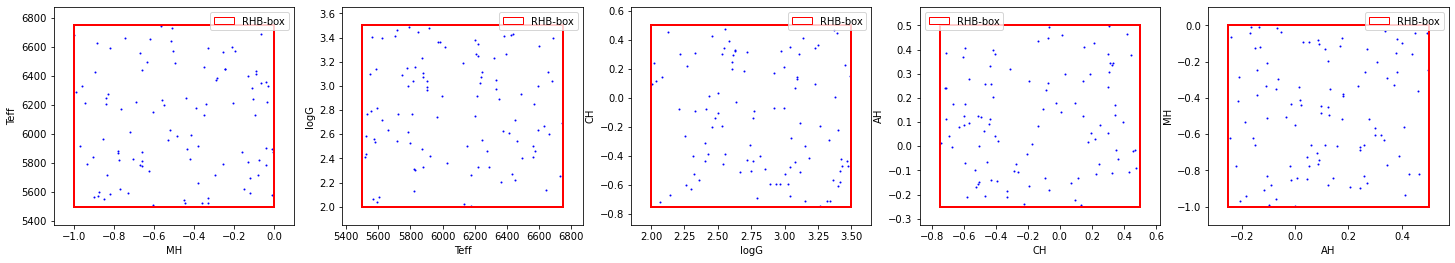

In [365]:
b.PLT.plot_box([0,1,2,3,4], pmts )


In [371]:
nTrain, nTest = 100000, 100
train_pmts = b.get_random_pmt(nTrain)
test_pmts = b.get_random_pmt(nTest)

In [373]:
NL=100
bk_fns_10k, bks_10k = b.get_bk_fns(NL, pmts = train_pmts, out_bks=1)
bk_fns_1k, bks_1k = b.get_bk_fns(NL, pmts = test_pmts, out_bks=1)

In [336]:
from PIML.nn.dnn.dnnWR import dnnWR

2021-12-31 12:51:39.829632: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [445]:
d = dnnWR()

In [447]:
d.init(W,R,nFtr=b.topk, out_idx=[1,2])

In [448]:
train_pmts.shape

(100000, 5)

In [454]:
aks = b.rbf_ak(train_pmts[:2])

In [ ]:
aks_test = b.rbf_ak(train_pmts[]

In [376]:
d.prepare(bks_10k, train_pmts, bks_1k, test_pmts) 

In [377]:
d.run(lr=0.01, dp=0.0, nEpoch=100, verbose=0)

Layers: [10, 64, 32, 16, 2]
| EP 100 |loss: 0.0063 | mean_: 0.0063 | val_l: 0.0064 | val_m: 0.0064 | lr: 0.0000 | 


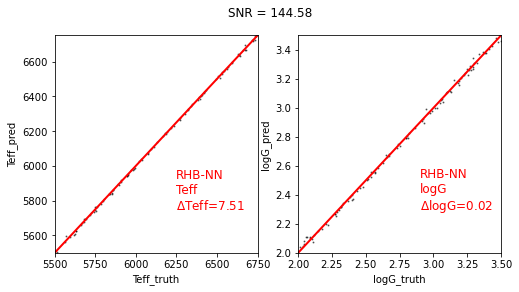

In [370]:
d.eval(snr = b.estimate_snr(NL))

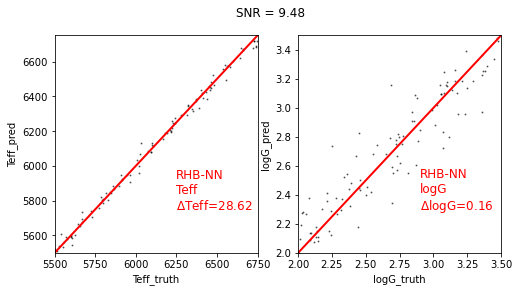

In [378]:
d.eval(snr = b.estimate_snr(NL))

In [ ]:
NL=100
bk_fns_10k, bks_10k = b.get_bk_fns(NL, pmts = train_pmts, out_bks=1)
bk_fns_1k, bks_1k = b.get_bk_fns(NL, pmts = test_pmts, out_bks=1)

In [382]:
bk_N_obs = b.get_bks_N_obs_from_pmt(noise_level=NL, pmt=b.PhyMid, N_obs=100)

In [391]:
b.PhyMid[d.odx]

array([6.0e+03, 2.5e+00])

In [395]:
d.eval_pmt_noise(bk_N_obs, b.PhyMid, 100)

(100, 2)
(100, 2)


TypeError: plot_box() missing 1 required positional argument: 'pdxs'

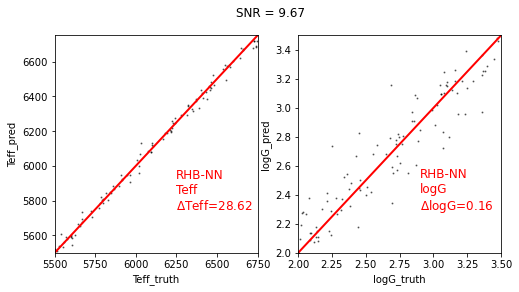

In [409]:
d.init_eval(NL, b.estimate_snr, b.get_bks_N_obs_from_pmt)

100%|██████████| 10/10 [00:01<00:00,  5.81it/s]


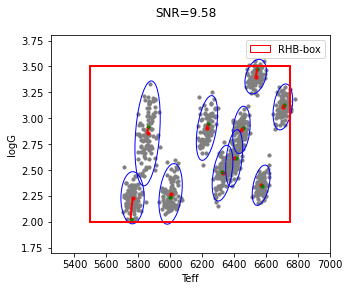

In [424]:
np.random.seed(926)
pmts = b.get_random_pmt(10)
d.eval_pmts_noise(pmts, NL, 100, 0.2)

100%|██████████| 10/10 [00:01<00:00,  5.05it/s]


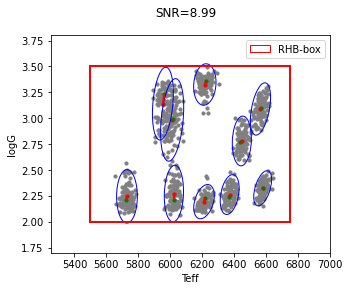

In [419]:
np.random.seed(1015)
pmts = b.get_random_pmt(10)
d.eval_pmts_noise(test_pmts[:10], NL, 100, 0.2)

100%|██████████| 10/10 [00:01<00:00,  7.95it/s]


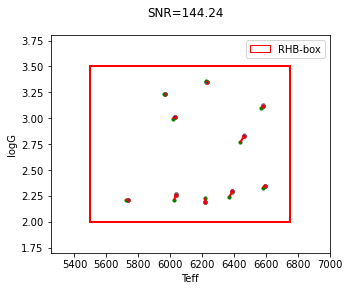

In [418]:
d.eval_pmts_noise(test_pmts[:10], 1, 10, 0.2)

In [407]:
preds

array([[5.93780401e+03, 2.49332368e+00],
       [6.03775650e+03, 2.57310952e+00],
       [5.98682369e+03, 2.56321526e+00],
       [6.05845223e+03, 2.55700625e+00],
       [5.96359144e+03, 2.67684199e+00],
       [5.95436975e+03, 2.30935119e+00],
       [6.02049469e+03, 2.90595248e+00],
       [5.99716830e+03, 2.22376805e+00],
       [6.03746711e+03, 2.37784439e+00],
       [5.99777813e+03, 2.34425741e+00]])

In [ ]:
# d.run(lr=0.01, dp=0.2, nEpoch=100, verbose=0)